In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bindingdb-for-dta/Ki_bind.tsv
/kaggle/input/bindingdb-for-dta/IC50_bind.tsv
/kaggle/input/bindingdb-for-dta/Kd_bind.tsv
/kaggle/input/bindingdb-for-dta/EC50_bind.tsv


In [2]:
df = pd.read_csv("/kaggle/input/bindingdb-for-dta/Ki_bind.tsv", sep='\t')
df

,drug_id,target_id,smiles,target_seq,origin_affinity,affinity
0,1,P04183,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MSCINLPTVLPGSPSKTRGQIQVILGPMFSGKSTELMRRVRRFQIA...,200,6.698970
1,1,P11413,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MAEQVALSRTQVCGILREELFQGDAFHQSDTHIFIIMGASGDLAKK...,1.54e+4,4.812479
2,1,P23919,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MAARRGALIVLEGVDRAGKSTQSRKLVEALCAAGHRAELLRFPERS...,180000,3.744727
3,1,P25099,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MPPYISAFQAAYIGIEVLIALVSVPGNVLVIWAVKVNQALRDATFC...,>10000,4.999957
4,1,P30543,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MGSSVYITVELAIAVLAILGNVLVCWAVWINSNLQNVTNFFVVSLA...,>10000,4.999957
...,...,...,...,...,...,...
380360,9995,P11511,C[C@]12CCC3C(C[C@@H](O)C4=CCCC[C@]34CO)C1CCC2=O,MVLEMLNPIHYNITSIVPEAMPAATMPVLLLTGLFLLVWNYEGTSS...,110,6.958607
380361,9996,P11511,C[C@]12CCC3C(CCC4=CCCC[C@]34C)C1CCC2=O,MVLEMLNPIHYNITSIVPEAMPAATMPVLLLTGLFLLVWNYEGTSS...,6.8,8.167491
380362,9997,P11511,C[C@]12CCC3C(CCC4=CCCC[C@]34CO)C1CCC2=O,MVLEMLNPIHYNITSIVPEAMPAATMPVLLLTGLFLLVWNYEGTSS...,5.8,8.236572
380363,9998,P11511,C[C@]12CCC3C(CC=C4CCCC[C@]34C)C1CCC2=O,MVLEMLNPIHYNITSIVPEAMPAATMPVLLLTGLFLLVWNYEGTSS...,120,6.920819


In [3]:
df2 = pd.read_csv("/kaggle/input/bindingdb-for-dta/IC50_bind.tsv", sep='\t')
df2

,drug_id,target_id,smiles,target_seq,origin_affinity,affinity
0,1,P04183,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MSCINLPTVLPGSPSKTRGQIQVILGPMFSGKSTELMRRVRRFQIA...,16,7.795880
1,1,P06479,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MASYPGHQHASAFDQAARSRGHSNRRTALRPRRQQEATEVRPEQKM...,1000,6.000000
2,1,P11413,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MAEQVALSRTQVCGILREELFQGDAFHQSDTHIFIIMGASGDLAKK...,2.1e+4,4.677781
3,10000,P11511,COc1ccc2cc(oc2c1)C(O)(c1ccc(F)cc1)c1cccnc1,MVLEMLNPIHYNITSIVPEAMPAATMPVLLLTGLFLLVWNYEGTSS...,44,7.356547
4,10001,P11511,COc1ccc2cc(oc2c1)C(O)(c1ccc(Cl)cc1)c1cccnc1,MVLEMLNPIHYNITSIVPEAMPAATMPVLLLTGLFLLVWNYEGTSS...,49,7.309804
...,...,...,...,...,...,...
1034575,99991,P30556,CCc1cc2c(s1)n(Cc1ccc(cc1)-c1ccccc1-c1nc(=O)o[n...,MILNSSTEDGIKRIQDDCPKAGRHNYIFVMIPTLYSIIFVVGIFGN...,1.8,8.744727
1034576,99992,P30556,CCc1cc2c(s1)n(Cc1ccc(cc1)-c1ccccc1-c1nc(=O)o[n...,MILNSSTEDGIKRIQDDCPKAGRHNYIFVMIPTLYSIIFVVGIFGN...,1.3,8.886057
1034577,99993,P30556,CCc1cc2c(s1)n(Cc1ccc(cc1)-c1ccccc1-c1nc(=O)o[n...,MILNSSTEDGIKRIQDDCPKAGRHNYIFVMIPTLYSIIFVVGIFGN...,1.4,8.853872
1034578,99994,P30556,CCc1cc2c(s1)n(Cc1ccc(cc1)-c1ccccc1-c1nc(=O)o[n...,MILNSSTEDGIKRIQDDCPKAGRHNYIFVMIPTLYSIIFVVGIFGN...,1.9,8.721246


In [4]:
df2.columns

Index(['drug_id', 'target_id', 'smiles', 'target_seq', 'origin_affinity',
       'affinity'],
      dtype='object')

In [5]:
def load_file(path, affinity_type):
    df = pd.read_csv(path, sep='\t')
    df = df[['smiles', 'target_seq', 'affinity']].dropna()
    df['AffinityType'] = affinity_type
    return df

df_ki = load_file('/kaggle/input/bindingdb-for-dta/Ki_bind.tsv', 'Ki')
df_ic50 = load_file('/kaggle/input/bindingdb-for-dta/IC50_bind.tsv', 'IC50')
df_kd = load_file('/kaggle/input/bindingdb-for-dta/Kd_bind.tsv', 'Kd')
df_ec50 = load_file('/kaggle/input/bindingdb-for-dta/EC50_bind.tsv', 'EC50')

# Merge them into one
df = pd.concat([df_ki, df_ic50, df_kd, df_ec50], ignore_index=True)
df

,smiles,target_seq,affinity,AffinityType
0,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MSCINLPTVLPGSPSKTRGQIQVILGPMFSGKSTELMRRVRRFQIA...,6.698970,Ki
1,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MAEQVALSRTQVCGILREELFQGDAFHQSDTHIFIIMGASGDLAKK...,4.812479,Ki
2,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MAARRGALIVLEGVDRAGKSTQSRKLVEALCAAGHRAELLRFPERS...,3.744727,Ki
3,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MPPYISAFQAAYIGIEVLIALVSVPGNVLVIWAVKVNQALRDATFC...,4.999957,Ki
4,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MGSSVYITVELAIAVLAILGNVLVCWAVWINSNLQNVTNFFVVSLA...,4.999957,Ki
...,...,...,...,...
1635682,CN1CCN(CC1)c1cccc(Nc2nc3c(cccn3n2)-c2ccc(cc2)S...,MDLEGDRNGGAKKKNFFKLNNKSEKDKKEKKPTVSVFSMFRYSNWL...,6.694649,EC50
1635683,Cc1cc(NCCCCO)n2c(nc3ccccc23)c1C#N,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,4.157953,EC50
1635684,CN1C(N(C)c2ccccc2C1=O)c1ccc2OCOc2c1,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,4.158053,EC50
1635685,COc1ccc(C2C3C(=O)CC(C)(C)CC3=NC(C)=C2C(=O)N2CC...,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,4.280470,EC50


In [6]:
from sklearn.preprocessing import MinMaxScaler
df = df[df['affinity'] > 0]  # avoid log(0)
df['affinity'] = np.log(df['affinity'])
scaler = MinMaxScaler()
df['affinity'] = scaler.fit_transform(df[['affinity']])

# Rename for consistency with model code
df.rename(columns={'smiles': 'Drug', 'target_seq': 'Target', 'affinity': 'Affinity'}, inplace=True)
df

/tmp/ipykernel_35/2390296033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['affinity'] = np.log(df['affinity'])
/tmp/ipykernel_35/2390296033.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['affinity'] = scaler.fit_transform(df[['affinity']])
/tmp/ipykernel_35/2390296033.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

,Drug,Target,Affinity,AffinityType
0,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MSCINLPTVLPGSPSKTRGQIQVILGPMFSGKSTELMRRVRRFQIA...,0.884738,Ki
1,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MAEQVALSRTQVCGILREELFQGDAFHQSDTHIFIIMGASGDLAKK...,0.840486,Ki
2,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MAARRGALIVLEGVDRAGKSTQSRKLVEALCAAGHRAELLRFPERS...,0.806921,Ki
3,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MPPYISAFQAAYIGIEVLIALVSVPGNVLVIWAVKVNQALRDATFC...,0.845599,Ki
4,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MGSSVYITVELAIAVLAILGNVLVCWAVWINSNLQNVTNFFVVSLA...,0.845599,Ki
...,...,...,...,...
1635682,CN1CCN(CC1)c1cccc(Nc2nc3c(cccn3n2)-c2ccc(cc2)S...,MDLEGDRNGGAKKKNFFKLNNKSEKDKKEKKPTVSVFSMFRYSNWL...,0.884652,EC50
1635683,Cc1cc(NCCCCO)n2c(nc3ccccc23)c1C#N,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,0.820926,EC50
1635684,CN1C(N(C)c2ccccc2C1=O)c1ccc2OCOc2c1,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,0.820929,EC50
1635685,COc1ccc(C2C3C(=O)CC(C)(C)CC3=NC(C)=C2C(=O)N2CC...,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,0.824811,EC50


/tmp/ipykernel_35/3885303606.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smiles_len'] = df['Drug'].apply(len)
/tmp/ipykernel_35/3885303606.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target_len'] = df['Target'].apply(len)


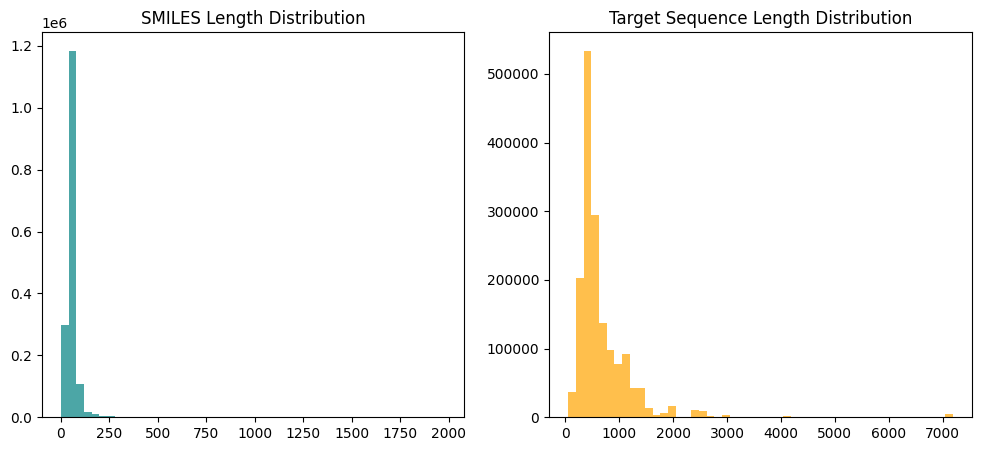

In [7]:
import matplotlib.pyplot as plt

df['smiles_len'] = df['Drug'].apply(len)
df['target_len'] = df['Target'].apply(len)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['smiles_len'], bins=50, color='teal', alpha=0.7)
plt.title("SMILES Length Distribution")

plt.subplot(1, 2, 2)
plt.hist(df['target_len'], bins=50, color='orange', alpha=0.7)
plt.title("Target Sequence Length Distribution")

plt.show()

In [8]:
max_len_drug = 100
max_len_target = 512

def pad_or_truncate(seq, max_len, pad_char=' '):
    seq = str(seq)
    if len(seq) > max_len:
        return seq[:max_len]
    else:
        return seq + pad_char * (max_len - len(seq))

df['Drug'] = df['Drug'].apply(lambda x: pad_or_truncate(x, max_len_drug))
df['Target'] = df['Target'].apply(lambda x: pad_or_truncate(x, max_len_target))

/tmp/ipykernel_35/631744863.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Drug'] = df['Drug'].apply(lambda x: pad_or_truncate(x, max_len_drug))
/tmp/ipykernel_35/631744863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = df['Target'].apply(lambda x: pad_or_truncate(x, max_len_target))


In [14]:
df=df[:100]

In [11]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 52.7 MB/s eta 0:00:00:00:0100:01


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import os
import json
import pickle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Add these imports and checks at the beginning of your notebook, 
# before creating your model
import tensorflow as tf
import os
import sys
import time  # For GPU benchmark
# Add at the top of your notebook
# Add after your imports
import gc
import tensorflow as tf

# Force garbage collection
gc.collect()
tf.keras.backend.clear_session()

# Memory monitoring function
def monitor_gpu_memory():
    """Monitor GPU memory usage during training"""
    try:
        # Get GPU memory stats
        gpu_devices = tf.config.list_physical_devices('GPU')
        if not gpu_devices:
            print("No GPU detected")
            return None
        
        # For TF 2.x
        memory_info = tf.config.experimental.get_memory_info('GPU:0')
        current_mb = memory_info['current'] / (1024 * 1024)
        peak_mb = memory_info['peak'] / (1024 * 1024)
        print(f"GPU Memory: Current={current_mb:.2f}MB, Peak={peak_mb:.2f}MB")
        return current_mb
    except Exception as e:
        print(f"Could not monitor GPU memory: {e}")
        return None


# Initialize callbacks list before using it
callbacks = []  # Define this BEFORE trying to append to it

# Now you can append to it
callbacks.append(tf.keras.callbacks.BackupAndRestore(
    backup_dir='./backup_checkpoints'
))

import nest_asyncio
nest_asyncio.apply()

# 1. Set environment variables for GPU memory growth
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Reduce logging noise

# 2. Better GPU detection and configuration
print("TensorFlow version:", tf.__version__)
print("GPU detection test:")

gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
    print(f"✓ Found {len(gpu_devices)} GPU(s):")
    for i, device in enumerate(gpu_devices):
        # Configure memory growth
        try:
            tf.config.experimental.set_memory_growth(device, True)
            details = tf.config.experimental.get_device_details(device)
            print(f"  [{i}] {details.get('device_name', device.name)} ({device.device_type})")
        except RuntimeError as e:
            print(f"  Error configuring GPU {device}: {e}")
            
    # Use mixed precision for Ampere architecture GPUs like the L4
    try:
        tf.keras.mixed_precision.set_global_policy('mixed_float16')
        print("✓ Enabled mixed precision training (float16)")
    except:
        print("✗ Could not enable mixed precision")
else:
    print("✗ No GPUs found. Checking CUDA installation...")
    
    # Check CUDA installation
    if not tf.test.is_built_with_cuda():
        print("  ✗ TensorFlow not built with CUDA support")
        print("  → Install tensorflow-gpu or tensorflow with CUDA support")
    
    # Try to manually detect NVIDIA GPUs via system commands
    try:
        import subprocess
        gpu_info = subprocess.check_output('nvidia-smi', shell=True).decode()
        if 'NVIDIA' in gpu_info:
            print("  ! NVIDIA GPU found via nvidia-smi but not recognized by TensorFlow")
            print("  → Check TensorFlow/CUDA compatibility")
            print(gpu_info.split('\n')[0])
    except:
        print("  × Could not run nvidia-smi")

class Sampling(layers.Layer):
    """Reparameterization trick with improved numerical stability."""
    
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        
        # Clip z_log_var to prevent extreme values
        z_log_var = tf.clip_by_value(z_log_var, -20.0, 2.0)
        
        # Create epsilon with same dtype as inputs
        epsilon = tf.random.normal(shape=(batch, dim), dtype=z_mean.dtype)
        
        # Return with clipped values
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon



class KLDivergenceLayer(layers.Layer):
    """Layer that computes KL divergence loss with added stability."""
    
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
    
    def call(self, inputs):
        z_mean, z_log_var = inputs
        # Clip values for stability
        z_log_var = tf.clip_by_value(z_log_var, -20.0, 2.0)
        z_mean = tf.clip_by_value(z_mean, -20.0, 20.0)
        
        # Use reduce_mean instead of keras.backend for better stability
        kl_loss = -0.5 * tf.reduce_sum(
            1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var),
            axis=-1
        )
        # Add as a loss with gradient clipping
        self.add_loss(tf.reduce_mean(kl_loss))
        return z_mean

# 2. Define custom VAE loss layer
class VAELoss(layers.Layer):
    """Custom layer to calculate VAE loss."""
    
    def __init__(self, smiles_max_length, **kwargs):
        super().__init__(**kwargs)
        self.smiles_max_length = smiles_max_length
    
    def call(self, inputs):
        y_true, y_pred, z_mean, z_log_var = inputs
        
        # Reconstruction loss
        reconstruction_loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred) 
        reconstruction_loss = tf.reduce_sum(reconstruction_loss, axis=-1)
        reconstruction_loss *= self.smiles_max_length
        
        # KL divergence
        kl_loss = -0.5 * tf.reduce_sum(
            1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), 
            axis=-1
        )
        
        # Total loss
        return tf.reduce_mean(reconstruction_loss + kl_loss)

class DrugDiscoveryCVAE:
    def __init__(self, smiles_max_length=120, target_max_length=1000, latent_dim=64):
        """
        Initialize the Conditional VAE model for drug discovery.
        
        Args:
            smiles_max_length: Maximum length of SMILES strings
            target_max_length: Maximum length of target protein sequences
            latent_dim: Dimension of the latent space
        """
        self.smiles_max_length = smiles_max_length
        self.target_max_length = target_max_length
        self.latent_dim = latent_dim
        
        # Placeholders for tokenizers
        self.smiles_tokenizer = None
        self.smiles_vocab_size = None
        self.target_tokenizer = None
        self.target_vocab_size = None
        
        # Placeholders for models
        self.encoder = None
        self.decoder = None
        self.cvae = None
        
        # Placeholder for affinity scaler
        self.affinity_scaler = StandardScaler()
        
        # For visualization and tracking
        self.history = None
        self.models_dir = "models"
        os.makedirs(self.models_dir, exist_ok=True)
        

    def preprocess_existing_dataframe(self, df):
        """
        Preprocess an existing pandas DataFrame containing drug-target-affinity data.
        
        Args:
            df: Pandas DataFrame with columns: 'Drug' (SMILES), 'Target' (protein sequence), 'Affinity'
            
        Returns:
            Preprocessed data ready for training
        """
        print("Preprocessing existing DataFrame...")
        print(f"DataFrame has {len(df)} samples")
        
        # Create tokenizers for SMILES and target sequences
        self.smiles_tokenizer = Tokenizer(char_level=True)
        self.smiles_tokenizer.fit_on_texts(df['Drug'].values)
        self.smiles_vocab_size = len(self.smiles_tokenizer.word_index) + 1
        print(f"SMILES vocabulary size: {self.smiles_vocab_size}")
        
        self.target_tokenizer = Tokenizer(char_level=True)
        self.target_tokenizer.fit_on_texts(df['Target'].values)
        self.target_vocab_size = len(self.target_tokenizer.word_index) + 1
        print(f"Target vocabulary size: {self.target_vocab_size}")
        
        # Convert sequences to integer indices
        smiles_seqs = self.smiles_tokenizer.texts_to_sequences(df['Drug'].values)
        target_seqs = self.target_tokenizer.texts_to_sequences(df['Target'].values)
        
        # Pad sequences to fixed length
        smiles_data = pad_sequences(smiles_seqs, maxlen=self.smiles_max_length, padding='post')
        target_data = pad_sequences(target_seqs, maxlen=self.target_max_length, padding='post')
        
        # One-hot encode SMILES for output layer
        smiles_one_hot = tf.keras.utils.to_categorical(smiles_data, num_classes=self.smiles_vocab_size)
        
        # Scale affinities
        affinities = df['Affinity'].values.reshape(-1, 1)
        self.affinity_scaler.fit(affinities)
        scaled_affinities = self.affinity_scaler.transform(affinities)
        
        # Split data into training and validation sets
        train_indices, val_indices = train_test_split(
            range(len(df)), test_size=0.2, random_state=42)
        
        train_data = {
            'smiles_data': smiles_data[train_indices],
            'smiles_one_hot': smiles_one_hot[train_indices],
            'target_data': target_data[train_indices],
            'affinities': scaled_affinities[train_indices]
        }
        
        val_data = {
            'smiles_data': smiles_data[val_indices],
            'smiles_one_hot': smiles_one_hot[val_indices],
            'target_data': target_data[val_indices],
            'affinities': scaled_affinities[val_indices]
        }
        
        print(f"Training data: {len(train_data['smiles_data'])} samples")
        print(f"Validation data: {len(val_data['smiles_data'])} samples")
        
        return train_data, val_data
        
    def build_encoder(self):
        """Build an ultra-simplified encoder for large datasets"""
        # SMILES input
        smiles_input = keras.Input(shape=(self.smiles_max_length,), name='smiles_input')
        
        # Target protein input
        target_input = keras.Input(shape=(self.target_max_length,), name='target_input')
        target_embedding = layers.Embedding(
            input_dim=self.target_vocab_size,
            output_dim=8,  # Reduced from 16
            input_length=self.target_max_length
        )(target_input)
        # Replace LSTM with GlobalAveragePooling - much less GPU memory
        target_features = layers.GlobalAveragePooling1D()(target_embedding)
        
        # Affinity input
        affinity_input = keras.Input(shape=(1,), name='affinity_input')
        
        # Encode SMILES with minimal embedding
        smiles_embedding = layers.Embedding(
            input_dim=self.smiles_vocab_size,
            output_dim=8,  # Reduced from 32
            input_length=self.smiles_max_length
        )(smiles_input)
        
        # Use GlobalAveragePooling instead of Conv1D - much faster and less memory
        smiles_features = layers.Conv1D(filters=16, kernel_size=3, padding='same', activation='relu')(smiles_embedding)
        smiles_features = layers.GlobalMaxPooling1D()(smiles_features)
        # Concatenate features
        x = layers.concatenate([smiles_features, target_features, affinity_input])
        
        # Very minimal dense layer
        x = layers.Dense(16, activation='relu')(x)
        
        # Smaller latent space
        self.latent_dim = 8  # Reduced from 16
        z_mean = layers.Dense(self.latent_dim, name='z_mean')(x)
        z_log_var = layers.Dense(self.latent_dim, name='z_log_var')(x)
        
        # Use our custom Sampling layer
        z = Sampling()([z_mean, z_log_var])
        
        # Create encoder model
        encoder = keras.Model(
            inputs=[smiles_input, target_input, affinity_input],
            outputs=[z_mean, z_log_var, z],
            name='encoder'
        )
        
        return encoder
         
        

    def build_decoder(self):
        """Build an ultra-simplified decoder for large datasets"""
        # Latent space input
        latent_input = keras.Input(shape=(self.latent_dim,), name='latent_input')
        
        # Target protein input
        target_input = keras.Input(shape=(self.target_max_length,), name='target_input')
        target_embedding = layers.Embedding(
            input_dim=self.target_vocab_size,
            output_dim=8,  # Reduced from 16
            input_length=self.target_max_length
        )(target_input)
        # Replace LSTM with GlobalAveragePooling
        target_features = layers.GlobalAveragePooling1D()(target_embedding)
        
        # Affinity input
        affinity_input = keras.Input(shape=(1,), name='affinity_input')
        
        # Concatenate inputs
        x = layers.concatenate([latent_input, target_features, affinity_input])
        
        # Minimal dense processing
        x = layers.Dense(32, activation='relu')(x)
        
        # Reshape for sequence generation - even smaller dimensions
        x = layers.Dense(self.smiles_max_length * 8, activation='relu')(x)  # Reduced from 16
        x = layers.Reshape((self.smiles_max_length, 8))(x)
        
        # Simple output projection - no Conv1D
        smiles_output = layers.TimeDistributed(
            layers.Dense(self.smiles_vocab_size, activation='softmax')
        )(x)
        
        # Create decoder model
        decoder = keras.Model(
            inputs=[latent_input, target_input, affinity_input],
            outputs=smiles_output,
            name='decoder'
        )
        
        return decoder
        
        
    def smiles_validity_loss(self, y_true, y_pred):
        """
        Custom loss function that penalizes sequences likely to be invalid SMILES.
        
        Args:
            y_true: One-hot encoded ground truth SMILES
            y_pred: Model predictions (probabilities)
        
        Returns:
            Additional loss to penalize likely invalid sequences
        """
        # Get most likely character at each position
        char_indices = tf.argmax(y_pred, axis=-1)
    
        # Track grammar violations
        
        # 1. Penalty for unbalanced parentheses 
        # Get one-hot indices for open and close parentheses
        open_paren_id = self.smiles_tokenizer.word_index.get('(', 0)
        close_paren_id = self.smiles_tokenizer.word_index.get(')', 0)
        
        # Count open and close parentheses in predicted sequence
        open_count = tf.reduce_sum(tf.cast(tf.equal(char_indices, open_paren_id), tf.float32), axis=1)
        close_count = tf.reduce_sum(tf.cast(tf.equal(char_indices, close_paren_id), tf.float32), axis=1)
        
        # Penalty for unbalanced parentheses
        paren_penalty = tf.abs(open_count - close_count) * 0.1
        
        # 2. Ring number balance penalty
        ring_penalties = []
        for num in range(1, 10):  # Ring numbers 1-9
            num_id = self.smiles_tokenizer.word_index.get(str(num), 0)
            if num_id > 0:
                count = tf.reduce_sum(tf.cast(tf.equal(char_indices, num_id), tf.float32), axis=1)
                # Each ring number should appear an even number of times
                ring_penalties.append(tf.math.floormod(count, 2.0) * 0.05)
        
        ring_penalty = tf.add_n(ring_penalties) if ring_penalties else tf.zeros_like(paren_penalty)
    
        # 3. Starting/ending character penalties
        first_chars = char_indices[:, 0]
        last_chars = char_indices[:, -1]
        
        # Get token IDs for characters that shouldn't start SMILES
        bad_start_ids = [self.smiles_tokenizer.word_index.get(c, 0) 
                        for c in [')', '=', '#', '+', '-'] if c in self.smiles_tokenizer.word_index]
        bad_end_ids = [self.smiles_tokenizer.word_index.get(c, 0)
                    for c in ['(', '=', '#'] if c in self.smiles_tokenizer.word_index]
        
        bad_start_penalty = tf.zeros_like(paren_penalty)
        bad_end_penalty = tf.zeros_like(paren_penalty)
        
        # Add penalty for each bad start/end character
        for bad_id in bad_start_ids:
            bad_start_penalty += tf.cast(tf.equal(first_chars, bad_id), tf.float32) * 0.1
        
        for bad_id in bad_end_ids:
            bad_end_penalty += tf.cast(tf.equal(last_chars, bad_id), tf.float32) * 0.1
        
        # Combine all penalties
        total_penalty = paren_penalty + ring_penalty + bad_start_penalty + bad_end_penalty
        
        # Shape the penalty to match the loss shape
        return total_penalty
    
        
    def build_cvae(self):
        """Build the complete CVAE model with proper Keras layers and SMILES validity loss."""
        # Build encoder and decoder
        self.encoder = self.build_encoder()
        self.decoder = self.build_decoder()
        
        # CVAE inputs
        smiles_input = keras.Input(shape=(self.smiles_max_length,), name='smiles_input')
        target_input = keras.Input(shape=(self.target_max_length,), name='target_input')
        affinity_input = keras.Input(shape=(1,), name='affinity_input')
        
        # Get latent space representation
        z_mean, z_log_var, z = self.encoder([smiles_input, target_input, affinity_input])
        
        # Apply KL divergence (this layer adds the KL loss to the model)
        kl_layer = KLDivergenceLayer()
        kl_layer([z_mean, z_log_var])
        
        # Generate SMILES from latent space
        smiles_output = self.decoder([z, target_input, affinity_input])

        # Create CVAE model
        self.cvae = keras.Model(
            inputs=[smiles_input, target_input, affinity_input],
            outputs=smiles_output,
            name='cvae'
        )
        
        # Define custom loss that combines categorical crossentropy with SMILES validity loss
        def combined_loss(y_true, y_pred):
            # Regular categorical crossentropy
            ce_loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
            ce_loss = tf.reduce_mean(ce_loss)
            
            # Add SMILES validity loss
            validity_loss = self.smiles_validity_loss(y_true, y_pred)
            validity_loss = tf.reduce_mean(validity_loss)
            
            # Cast both to the same type before adding
            ce_loss = tf.cast(ce_loss, tf.float32)
            validity_loss = tf.cast(validity_loss, tf.float32)
            
            # Return combined loss with weighting
            return ce_loss + 0.5 * validity_loss
    
        # Compile with the combined loss
        self.cvae.compile(
            optimizer='adam',
            loss=combined_loss
        )
        
        # Print model summaries
        print("\n---- Encoder Model Summary ----")
        self.encoder.summary()
        
        print("\n---- Decoder Model Summary ----")
        self.decoder.summary()
        
        print("\n---- Complete CVAE Model Summary ----")
        self.cvae.summary()
        
        # Calculate total parameters
        encoder_params = self.encoder.count_params()
        decoder_params = self.decoder.count_params()
        total_params = self.cvae.count_params()
        
        print(f"\nTotal trainable parameters: {total_params:,}")
        print(f"Encoder parameters: {encoder_params:,}")
        print(f"Decoder parameters: {decoder_params:,}")
        
        print("CVAE model built and compiled with SMILES validity loss.")
        
       
        
        

    def train(self, train_data, val_data, batch_size=32, epochs=50):
        """Train the CVAE model."""
        if self.cvae is None:
            self.build_cvae()
        
        print(f"Training CVAE for {epochs} epochs with batch size {batch_size}...")
        
        # Callbacks
        callbacks = [
            keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1),
            keras.callbacks.ModelCheckpoint(
                filepath=os.path.join(self.models_dir, 'cvae_best.h5'),
                monitor='val_loss',
                save_best_only=True
            )
        ]
    
        # Prepare simplified inputs (we don't need smiles_one_hot as input anymore)
        train_inputs = [
            train_data['smiles_data'],      # Integer encoded SMILES
            train_data['target_data'],      # Target protein data
            train_data['affinities']        # Affinity values
        ]
        
        val_inputs = [
            val_data['smiles_data'],
            val_data['target_data'],
            val_data['affinities']
        ]
        
        # Train the model
        self.history = self.cvae.fit(
            train_inputs,
            train_data['smiles_one_hot'],  # Target is the one-hot SMILES
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(val_inputs, val_data['smiles_one_hot']),
            callbacks=callbacks
        )
        
        # Save models
        self.cvae.save(os.path.join(self.models_dir, 'cvae_final.h5'))
        self.encoder.save(os.path.join(self.models_dir, 'encoder.h5'))
        self.decoder.save(os.path.join(self.models_dir, 'decoder.h5'))
        
        print("Training completed. Models saved.")
        self.plot_training_history()
        

    def plot_training_history(self):
        """Plot the training history."""
        if self.history is None:
            print("No training history available.")
            return
        
        plt.figure(figsize=(12, 4))
        
        # Plot training & validation loss
        plt.subplot(1, 1, 1)
        plt.plot(self.history.history['loss'])
        plt.plot(self.history.history['val_loss'])
        plt.title('Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper right')
        
        # Save figure
        plt.savefig(os.path.join(self.models_dir, 'training_history.png'))
        plt.close()
        
        print("Training history plotted and saved.")

    def generate_molecules(self, target_sequence, desired_affinity, n_samples=20, temperature=0.6):
        """Generate valid molecules with enhanced grammar constraints for SMILES."""
        if self.decoder is None:
            raise ValueError("Decoder model not available. Train or load a model first.")
        
        # Scale affinity
        scaled_affinity = self.affinity_scaler.transform([[desired_affinity]])
        
        # Convert target sequence to input format
        target_seq = self.target_tokenizer.texts_to_sequences([target_sequence])
        padded_target = pad_sequences(target_seq, maxlen=self.target_max_length, padding='post')
        
        # Create reverse mapping from indices to characters
        idx_to_char = {idx: char for char, idx in self.smiles_tokenizer.word_index.items()}
        idx_to_char[0] = ''  # Add padding token
        
        # Generate many more samples to improve chances of getting valid molecules
        n_attempts = max(200, n_samples * 20)  # Increased from 10x to 20x
        z_samples = np.random.normal(size=(n_attempts, self.latent_dim))
        
        # Prepare conditional inputs
        target_input = np.repeat(padded_target, n_attempts, axis=0)
        affinity_input = np.repeat(scaled_affinity, n_attempts, axis=0)
        
        # Generate probabilities
        print(f"Generating {n_attempts} candidate molecules...")
        generated = self.decoder.predict([z_samples, target_input, affinity_input], verbose=1)
        
        # Track valid SMILES and all attempts
        valid_smiles = []
        all_attempts = 0
        progress_interval = max(1, n_attempts // 10)
        
        # Get character IDs grouped by type
        atom_ids = [self.smiles_tokenizer.word_index.get(c, 0) for c in 'CNOPSFIBrclnops']
        branch_open_ids = [self.smiles_tokenizer.word_index.get('(', 0)]
        branch_close_ids = [self.smiles_tokenizer.word_index.get(')', 0)]
        ring_ids = [self.smiles_tokenizer.word_index.get(str(i), 0) for i in range(1,10)]
        bond_ids = [self.smiles_tokenizer.word_index.get(c, 0) for c in '-=#:']
        
        for i in range(n_attempts):
            if len(valid_smiles) >= n_samples:
                break
        
            all_attempts += 1
            if all_attempts % progress_interval == 0:
                print(f"Processing attempt {all_attempts}/{n_attempts}, found {len(valid_smiles)} valid molecules...")
            
            # Process this candidate with adjusted temperature to control randomness
            probs = np.exp(np.log(generated[i] + 1e-10) / temperature)
            probs = probs / np.sum(probs, axis=1, keepdims=True)
            
            # State tracking for grammar constraints
            open_branches = 0  # Count of open parentheses
            open_rings = set()  # Set of currently open ring numbers
            last_was_atom = False
            last_was_bond = False
            last_was_ring = False
            last_atom = None
            
            smiles_indices = []
            
            # Build molecule token by token with strict constraints
            for j in range(min(self.smiles_max_length, probs.shape[0])):
                # For first position, must be atom or open branch
                if j == 0:
                    allowed_ids = atom_ids
                    mask = np.zeros_like(probs[j])
                    for idx in allowed_ids:
                        if idx < len(mask):
                            mask[idx] = 1
                    filtered_probs = probs[j] * mask
                
                else:  # Use grammar rules for subsequent positions
                    mask = np.zeros_like(probs[j])
                    
                    # Rules based on previous token type
                    if last_was_atom:
                        # After atom: can be bond, branch start/end, ring number, or another atom
                        allowed_ids = bond_ids + branch_open_ids + branch_close_ids + ring_ids + atom_ids
                        # Don't allow branch close if no branches are open
                        if open_branches == 0:
                            allowed_ids = [id for id in allowed_ids if id not in branch_close_ids]
                        
                    elif last_was_bond:
                        # After bond: must be atom or branch open
                        allowed_ids = atom_ids + branch_open_ids
                        
                    elif last_was_ring:
                        # After ring: can be bond, branch start/end, another ring, or atom
                        allowed_ids = bond_ids + branch_open_ids + branch_close_ids + ring_ids + atom_ids
                        if open_branches == 0:
                            allowed_ids = [id for id in allowed_ids if id not in branch_close_ids]
                        
                    else:  # After branch open/close
                        if open_branches > 0:
                            # After branch open: must be atom, bond or another branch open
                            allowed_ids = atom_ids + bond_ids + branch_open_ids
                        else:
                            # After a full branch closure (no open branches), can be almost anything
                            allowed_ids = atom_ids + bond_ids + branch_open_ids
                    
                    # Apply mask for allowed tokens
                    for idx in allowed_ids:
                        if idx < len(mask):
                            mask[idx] = 1
                    filtered_probs = probs[j] * mask
                
                # If no allowed tokens (all zeros), default to carbon
                if np.sum(filtered_probs) == 0:
                    carbon_id = self.smiles_tokenizer.word_index.get('C', 0)
                    if carbon_id > 0:
                        idx = carbon_id
                    else:
                        break  # Can't continue if we don't have a carbon atom ID
                else:
                    # Re-normalize probabilities
                    filtered_probs = filtered_probs / np.sum(filtered_probs)
                
                    # Sample token from filtered probabilities
                    try:
                        idx = np.random.choice(len(filtered_probs), p=filtered_probs)
                    except:
                        # Fallback if sampling fails
                        idx = np.argmax(filtered_probs)
                
                # Update state based on selected token
                char = idx_to_char.get(idx, '')
                
                # Update state tracking based on the chosen token
                if char in 'CNOPSFIBrclnops':
                    last_was_atom = True
                    last_was_bond = False
                    last_was_ring = False
                    last_atom = char
                elif char in '-=#:':
                    last_was_atom = False
                    last_was_bond = True
                    last_was_ring = False
                elif char in '123456789':
                    last_was_atom = False
                    last_was_bond = False
                    last_was_ring = True
                    # Toggle ring open/closed status
                    if char in open_rings:
                        open_rings.remove(char)
                    else:
                        open_rings.add(char)
                elif char == '(':
                    open_branches += 1
                    last_was_atom = False
                    last_was_bond = False
                    last_was_ring = False
                elif char == ')':
                    if open_branches > 0:  # Only close if we have open branches
                        open_branches -= 1
                    last_was_atom = False
                    last_was_bond = False
                    last_was_ring = False
            
                if char:  # Add non-empty character to our sequence
                    smiles_indices.append(idx)
                
                # Early stopping conditions:
                # 1. When we have a reasonable length and no open branches/rings
                # 2. Or if we hit a max absolute length
                reasonable_length = len(smiles_indices) >= 5
                completed = open_branches == 0 and len(open_rings) == 0
                if reasonable_length and completed and last_was_atom:
                    break
                if len(smiles_indices) >= self.smiles_max_length * 0.75:
                    break
            
            # Convert indices to SMILES string
            generated_smiles = ''.join([idx_to_char.get(idx, '') for idx in smiles_indices])
            
            # Clean up any remaining issues and ensure valid chemistry
            processed_smiles = self._fix_smiles(generated_smiles)
            
            # Validate with RDKit
            mol = Chem.MolFromSmiles(processed_smiles)
            if mol is not None:
                # Get canonical SMILES to avoid duplicates
                canonical_smiles = Chem.MolToSmiles(mol)
                if canonical_smiles not in valid_smiles:
                    valid_smiles.append(canonical_smiles)
        
        print(f"Generated {len(valid_smiles)} valid molecules out of {all_attempts} attempts.")
        
        # Return the requested number of molecules (or all if fewer were found)
        return valid_smiles[:n_samples]
        
        
                    
                   

    def _fix_smiles(self, smiles):
        """Enhanced function to fix common SMILES issues"""
        if not smiles:
            return "C"  # Default to methane if empty
        
        # Clean up invalid characters
        valid_chars = set('CNOPSFIBrclnops-=#:()[]123456789.+%')
        smiles = ''.join(c for c in smiles if c in valid_chars)
        
        # Ensure there's at least one atom
        if not any(c.upper() in 'CNOPSFIBRCLNOPS' for c in smiles):
            return "C"  # Default to methane if no valid atoms
        
        # Step 1: Fix basic structure issues
        try:
            # Find and process valid fragment if SMILES is invalid
            for attempt in range(3):  # Try multiple strategies
                # Balance parentheses
                open_count = smiles.count('(') + smiles.count('[')
                close_count = smiles.count(')') + smiles.count(']')
                
                if open_count > close_count:
                    smiles += ')' * (open_count - close_count)
                elif close_count > open_count:
                    smiles = '(' * (close_count - open_count) + smiles
            
                # Fix ring numbers (each must appear exactly twice)
                for num in '123456789':
                    count = smiles.count(num)
                    if count % 2 == 1:  # Odd count needs fixing
                        if count == 1:  # If only appears once, remove it
                            smiles = smiles.replace(num, '')
                        else:  # For higher odd counts, remove last occurrence
                            last_idx = smiles.rindex(num)
                            smiles = smiles[:last_idx] + smiles[last_idx+1:]
                
                # Fix bond issues (no consecutive bonds, no trailing bonds)
                i = 0
                while i < len(smiles) - 1:
                    if smiles[i] in '-=#:' and smiles[i+1] in '-=#:':
                        smiles = smiles[:i+1] + 'C' + smiles[i+1:]
                    i += 1
                
                # Handle bonds at beginning/end
                if smiles and smiles[0] in '-=#:':
                    smiles = 'C' + smiles
                if smiles and smiles[-1] in '-=#:':
                    smiles = smiles + 'C'
            
                # Try to parse with RDKit
                mol = Chem.MolFromSmiles(smiles)
                if mol is not None:
                    return Chem.MolToSmiles(mol)  # Return canonical form
                
                # If parsing failed, try simpler fragment-based approach
                if attempt == 1:
                    # Find the largest sequence of valid atoms/bonds
                    atoms = set('CNOPSFIBrclnops')
                    valid_fragment = ""
                    current_fragment = ""
                    
                    for c in smiles:
                        if c in atoms or c in '-=#:123456789()':
                            current_fragment += c
                        else:
                            if len(current_fragment) > len(valid_fragment):
                                valid_fragment = current_fragment
                            current_fragment = ""
                
                    if len(current_fragment) > len(valid_fragment):
                        valid_fragment = current_fragment
                    
                    if valid_fragment:
                        smiles = valid_fragment
                    else:
                        return "C"  # If no valid fragment, return methane
                
                # Last resort: just keep atoms and simple bonds
                if attempt == 2:
                    atoms = ''.join(c for c in smiles if c.upper() in 'CNOPSFIBRCLNOPS')
                    if atoms:
                        return atoms[0].upper()  # Return first atom
                    return "C"
        
        except Exception as e:
            # If any exception occurs in fixing, return a simple structure
            print(f"Error fixing SMILES: {e}")
            return "C"
        
        # If all else fails, return methane
        return "C"
        
    
              
             



    def save_preprocessing_objects(self, filepath=None):
        """Save tokenizers and scalers for later use"""
        if filepath is None:
            filepath = self.models_dir
        
        # Save tokenizers
        with open(os.path.join(filepath, 'smiles_tokenizer.pkl'), 'wb') as f:
            pickle.dump(self.smiles_tokenizer, f)
        
        with open(os.path.join(filepath, 'target_tokenizer.pkl'), 'wb') as f:
            pickle.dump(self.target_tokenizer, f)
        
        # Save affinity scaler
        with open(os.path.join(filepath, 'affinity_scaler.pkl'), 'wb') as f:
            pickle.dump(self.affinity_scaler, f)
        
        # Save vocabulary sizes
        with open(os.path.join(filepath, 'vocab_sizes.json'), 'w') as f:
            json.dump({
                'smiles_vocab_size': self.smiles_vocab_size,
                'target_vocab_size': self.target_vocab_size
            }, f)
        
        print(f"Preprocessing objects saved to {filepath}")

    def load_preprocessing_objects(self, filepath=None):
        """Load tokenizers and scalers"""
        if filepath is None:
            filepath = self.models_dir
        
        # Load tokenizers
        with open(os.path.join(filepath, 'smiles_tokenizer.pkl'), 'rb') as f:
            self.smiles_tokenizer = pickle.load(f)
        
        with open(os.path.join(filepath, 'target_tokenizer.pkl'), 'rb') as f:
            self.target_tokenizer = pickle.load(f)
        
        # Load affinity scaler
        with open(os.path.join(filepath, 'affinity_scaler.pkl'), 'rb') as f:
            self.affinity_scaler = pickle.load(f)
        
        # Load vocabulary sizes
        with open(os.path.join(filepath, 'vocab_sizes.json'), 'r') as f:
            vocab_sizes = json.load(f)
            self.smiles_vocab_size = vocab_sizes['smiles_vocab_size']
            self.target_vocab_size = vocab_sizes['target_vocab_size']
        
        print(f"Preprocessing objects loaded from {filepath}")

    def _process_data_chunk(self, chunk_df):
        """Process a chunk of data"""
        # Convert sequences to integer indices
        smiles_seqs = self.smiles_tokenizer.texts_to_sequences(chunk_df['Drug'].values)
        target_seqs = self.target_tokenizer.texts_to_sequences(chunk_df['Target'].values)
        
        # Pad sequences
        smiles_data = pad_sequences(smiles_seqs, maxlen=self.smiles_max_length, padding='post')
        target_data = pad_sequences(target_seqs, maxlen=self.target_max_length, padding='post')
        
        # One-hot encode SMILES
        smiles_one_hot = tf.keras.utils.to_categorical(smiles_data, num_classes=self.smiles_vocab_size)
        
        # Scale affinities
        affinities = chunk_df['Affinity'].values.reshape(-1, 1)
        scaled_affinities = self.affinity_scaler.transform(affinities)
        
        # Split into train/val
        train_indices, val_indices = train_test_split(
            range(len(chunk_df)), test_size=0.1, random_state=42)
        
        train_chunk = {
            'smiles_data': smiles_data[train_indices],
            'smiles_one_hot': smiles_one_hot[train_indices],
            'target_data': target_data[train_indices],
            'affinities': scaled_affinities[train_indices]
        }
        
        val_chunk = {
            'smiles_data': smiles_data[val_indices],
            'smiles_one_hot': smiles_one_hot[val_indices],
            'target_data': target_data[val_indices],
            'affinities': scaled_affinities[val_indices]
        }
        
        return train_chunk, val_chunk

    def _combine_data_chunks(self, chunks):
        """Combine data chunks"""
        combined = {
            'smiles_data': np.vstack([chunk['smiles_data'] for chunk in chunks]),
            'smiles_one_hot': np.vstack([chunk['smiles_one_hot'] for chunk in chunks]),
            'target_data': np.vstack([chunk['target_data'] for chunk in chunks]),
            'affinities': np.vstack([chunk['affinities'] for chunk in chunks])
        }
        return combined
    
    def train_with_checkpoint(self, df, batch_size=32, epochs_per_checkpoint=5, 
                         max_epochs=100, val_split=0.2, resume_from=None,
                         save_every=5):
        """Train on large datasets with checkpointing using available accelerators."""
        print("Preparing for training with checkpointing...")
        
        # Check for available accelerators
        gpus = tf.config.list_physical_devices('GPU')
        tpus = tf.config.list_physical_devices('TPU')
    
        if gpus:
            print(f"Found {len(gpus)} GPU(s). Configuring TensorFlow to use GPU acceleration.")
            try:
                # Enable memory growth to avoid allocating all GPU memory at once
                for gpu in gpus:
                    tf.config.experimental.set_memory_growth(gpu, True)
                
                # Enable mixed precision training for faster computation on modern GPUs
                if tf.__version__ >= '2.4.0':
                    policy = tf.keras.mixed_precision.Policy('mixed_float16')
                    tf.keras.mixed_precision.set_global_policy(policy)
                    print("Enabled mixed precision training (float16)")
            except Exception as e:
                print(f"Error configuring GPU: {e}")
        elif tpus:
            print(f"Found {len(tpus)} TPU(s). Configuring TensorFlow to use TPU acceleration.")
            try:
                resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
                tf.config.experimental_connect_to_cluster(resolver)
                tf.tpu.experimental.initialize_tpu_system(resolver)
                strategy = tf.distribute.TPUStrategy(resolver)
                print(f"TPU strategy initialized with {strategy.num_replicas_in_sync} replicas")
            except Exception as e:
                print(f"Error configuring TPU: {e}")
        else:
            print("No GPUs or TPUs found. Training will proceed on CPU.")
        
        # Force eager execution for better error messages and debugging
        tf.config.run_functions_eagerly(True)

        if len(df) > 50000:
            print(f"Large dataset detected ({len(df)} samples). Using sampling strategy.")
            # Sample a subset for preprocessing fitting
            sample_size = min(50000, len(df) // 2)
            fit_sample = df.sample(sample_size, random_state=42)
            
            # Fit tokenizers on the sample
            self.smiles_tokenizer = Tokenizer(char_level=True)
            self.smiles_tokenizer.fit_on_texts(fit_sample['Drug'].values)
            self.smiles_vocab_size = len(self.smiles_tokenizer.word_index) + 1
            
            self.target_tokenizer = Tokenizer(char_level=True)
            self.target_tokenizer.fit_on_texts(fit_sample['Target'].values)
            self.target_vocab_size = len(self.target_tokenizer.word_index) + 1
            
            # Fit the affinity scaler on the sample
            self.affinity_scaler.fit(fit_sample['Affinity'].values.reshape(-1, 1))
            
            # Now process in smaller chunks
            chunk_size = 10000
            train_chunks = []
            val_chunks = []
            for i in range(0, len(df), chunk_size):
                chunk = df.iloc[i:i+chunk_size]
                chunk_train, chunk_val = self._process_data_chunk(chunk)
                train_chunks.append(chunk_train)
                val_chunks.append(chunk_val)
            
            # Combine the chunks
            train_data = self._combine_data_chunks(train_chunks)
            val_data = self._combine_data_chunks(val_chunks)
        
        if resume_from:
            # Load previous preprocessing and weights
            self.load_preprocessing_objects(resume_from)
            starting_epoch = self._load_checkpoint(resume_from)
            print(f"Resuming from epoch {starting_epoch}")
        else:
            # Start from scratch - preprocess data
            train_data, val_data = self.preprocess_existing_dataframe(df)
            
            # Save preprocessing objects
            self.save_preprocessing_objects()
            
            # Build model if not already built
            if self.cvae is None:
                self.build_cvae()
            
            starting_epoch = 0
        
        # Callbacks for training
        checkpoint_dir = os.path.join(self.models_dir, 'checkpoints')
        os.makedirs(checkpoint_dir, exist_ok=True)
        
        callbacks = [
            tf.keras.callbacks.ModelCheckpoint(
                filepath=os.path.join(checkpoint_dir, 'epoch{epoch:03d}.weights.h5'),
                save_weights_only=True,
                save_freq=save_every * (len(train_data['smiles_data']) // batch_size),
                save_best_only=False
            ),
            tf.keras.callbacks.ModelCheckpoint(
                filepath=os.path.join(checkpoint_dir, 'best_model.weights.h5'),
                save_weights_only=True,
                monitor='val_loss',
                save_best_only=True
            ),    
            tf.keras.callbacks.TensorBoard(
                log_dir=os.path.join(self.models_dir, 'logs'),
                histogram_freq=1,
                write_graph=True,
                profile_batch='500,520'  # Profile performance for specific batches
            ),
            tf.keras.callbacks.CSVLogger(
                os.path.join(self.models_dir, 'training_log.csv'),
                append=True if resume_from else False
            ),
            tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=10,
                restore_best_weights=True
            ),
            tf.keras.callbacks.ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.5,
                patience=5,
                min_lr=1e-6
            )
        ]
        
        # Convert inputs to numpy arrays with explicit dtypes for better performance
        train_inputs = [
            tf.convert_to_tensor(train_data['smiles_data'], dtype=tf.float16),
            tf.convert_to_tensor(train_data['target_data'], dtype=tf.float16),
            tf.convert_to_tensor(train_data['affinities'], dtype=tf.float16)
        ]
        
        val_inputs = [
            np.array(val_data['smiles_data'], dtype=np.float32),
            np.array(val_data['target_data'], dtype=np.float32),
            np.array(val_data['affinities'], dtype=np.float32)
        ]
        
        train_outputs = np.array(train_data['smiles_one_hot'], dtype=np.float32)
        val_outputs = np.array(val_data['smiles_one_hot'], dtype=np.float32)
        
        # Train with error handling and fallback options
        print(f"Starting training from epoch {starting_epoch} for {max_epochs} epochs")
        try:
            # Use a larger batch size if GPU is available
            if gpus:
                adjusted_batch_size = batch_size * 2
                print(f"Using increased batch size for GPU: {adjusted_batch_size}")
            else:
                adjusted_batch_size = batch_size
            
            # FIXED: Removed unsupported 'workers' and 'use_multiprocessing' arguments
            self.history = self.cvae.fit(
                train_inputs,
                train_outputs,
                batch_size=adjusted_batch_size,
                initial_epoch=starting_epoch,
                epochs=starting_epoch + max_epochs,
                validation_data=(val_inputs, val_outputs),
                callbacks=callbacks,
                verbose=1
                # Removed: workers=4, use_multiprocessing=True
            )
        except RuntimeError as e:
            print(f"Error during training: {e}")
            print("Trying again with CPU only...")
            
            
            # Reset mixed precision policy if it was enabled
            if gpus and tf.__version__ >= '2.4.0':
                tf.keras.mixed_precision.set_global_policy('float32')
            
            # Fall back to CPU-only execution
            with tf.device('/CPU:0'):
                self.history = self.cvae.fit(
                    train_inputs,
                    train_outputs,
                    batch_size=batch_size,
                    initial_epoch=starting_epoch,
                    epochs=starting_epoch + max_epochs,
                    validation_data=(val_inputs, val_outputs),
                    callbacks=callbacks,
                    verbose=1
                )
        
        # Reset to graph mode for inference
        tf.config.run_functions_eagerly(False)
        
        # FIXED: Changed file extensions to match required pattern (.weights.h5)
        self.cvae.save_weights(os.path.join(self.models_dir, 'cvae_final.weights.h5'))
        self.encoder.save_weights(os.path.join(self.models_dir, 'encoder_final.weights.h5'))
        self.decoder.save_weights(os.path.join(self.models_dir, 'decoder_final.weights.h5'))
        
        print("Training completed. Models saved.")
        self.plot_training_history()

    def _load_checkpoint(self, checkpoint_dir):
        """Load model weights from checkpoint"""
        # Find the latest checkpoint with the .weights.h5 extension
        checkpoints = [f for f in os.listdir(checkpoint_dir) 
                    if f.startswith('epoch') and f.endswith('.weights.h5')]
        
        if not checkpoints:
            print("No checkpoints found.")
            return 0
        
        # Get the latest checkpoint
        latest_checkpoint = max(checkpoints, key=lambda x: int(x[5:8]))  # Extract epoch number
        checkpoint_path = os.path.join(checkpoint_dir, latest_checkpoint)
        
        # Load weights
        self.cvae.load_weights(checkpoint_path)
        
        # Extract epoch number from checkpoint name
        epoch = int(latest_checkpoint[5:8])
        return epoch + 1

class DataGenerator(tf.keras.utils.Sequence):
    """Generate batches of data on the fly to save memory"""
    
    def __init__(self, smiles_data, target_data, affinities, smiles_one_hot,  
                 batch_size=32, shuffle=True):
        self.smiles_data = smiles_data
        self.target_data = target_data
        self.affinities = affinities
        self.smiles_one_hot = smiles_one_hot
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indices = np.arange(len(self.smiles_data))
        if self.shuffle:
            np.random.shuffle(self.indices)

    def __len__(self):
        return int(np.ceil(len(self.smiles_data) / self.batch_size))

    def __getitem__(self, idx):
        # Get batch indices
        batch_indices = self.indices[idx * self.batch_size:(idx + 1) * self.batch_size]
        
        # Create batch
        batch_smiles = self.smiles_data[batch_indices]
        batch_target = self.target_data[batch_indices]
        batch_affinity = self.affinities[batch_indices]
        batch_smiles_one_hot = self.smiles_one_hot[batch_indices]
        
        # Create input and output
        x = [batch_smiles, batch_target, batch_affinity]
        y = batch_smiles_one_hot
        
        return x, y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

class DataChunkGenerator:
    """Process and train on data in chunks to avoid memory issues"""
    
    def __init__(self, df, chunk_size=1000):
        self.df = df
        self.chunk_size = chunk_size
        self.current_idx = 0
    
    def __len__(self):
        return len(range(0, len(self.df), self.chunk_size))
    
    def get_next_chunk(self):
        """Get next chunk of data"""
        if self.current_idx >= len(self.df):
            return None
        
        end_idx = min(self.current_idx + self.chunk_size, len(self.df))
        chunk = self.df.iloc[self.current_idx:end_idx]
        self.current_idx = end_idx
        return chunk

    def reset(self):
        """Reset to beginning of data"""
        self.current_idx = 0

# Example usage with Kaggle
if __name__ == "__main__":
    # Load your data
    
    chunk_generator = DataChunkGenerator(df, chunk_size=5000)
    model = DrugDiscoveryCVAE(
        smiles_max_length=100,
        target_max_length=512,
        latent_dim=16
    )
    
    # First, fit tokenizers on a sample of data
    sample_size = min(50000, len(df))
    sample_df = df.sample(sample_size, random_state=42)
    train_data, val_data = model.preprocess_existing_dataframe(sample_df)
    
    # Build model
    model.build_cvae()
    # Then train on chunks
    for epoch in range(50):
        print(f"Epoch {epoch+1}/50")
        chunk_generator.reset()
        epoch_loss = []
        
        chunk = chunk_generator.get_next_chunk()
        chunk_num = 1
        
        while chunk is not None:
            print(f"  Processing chunk {chunk_num}/{len(chunk_generator)}...")
            
            # Process chunk
            chunk_train, chunk_val = model._process_data_chunk(chunk)
            
            # Train on chunk with reduced batch size
            batch_size = 16  # Very small batch size
            history = model.cvae.fit(
                [chunk_train['smiles_data'], chunk_train['target_data'], chunk_train['affinities']], 
                chunk_train['smiles_one_hot'],
                batch_size=batch_size,
                epochs=1,
                verbose=1
            )
            epoch_loss.append(history.history['loss'][0])
            tf.keras.backend.clear_session()
            gc.collect()
            
            # Get next chunk
            chunk = chunk_generator.get_next_chunk()
            chunk_num += 1
        
        # Save checkpoint after each epoch
        os.makedirs("models/checkpoints", exist_ok=True)

        model.cvae.save_weights(f"models/checkpoints/epoch{epoch+1:03d}.weights.h5")
        print(f"Epoch {epoch+1} average loss: {sum(epoch_loss)/len(epoch_loss):.4f}")

    
    # Explicitly verify we're using GPU for at least one operation
    """with tf.device('/GPU:0'):
        test_tensor = tf.random.normal([1000, 1000])
        test_result = tf.matmul(test_tensor, test_tensor)
        # If this executes without error, GPU is working
        print(f"GPU Test - Tensor shape: {test_result.shape}")
        
    print("Memory before training:")
    monitor_gpu_memory()
    # Then modify these training parameters
    model.train_with_checkpoint(
        df=df,
        batch_size=32,               # REDUCED from 256 to 32
        max_epochs=50,
        val_split=0.05,
        resume_from=None,
        save_every=1
    )"""
    
    # Generate molecules using the trained model
    target_protein = df['Target'].iloc[0]  # Use first target as example
    desired_affinity = 0.8  # nM, adjust as needed
    
    generated_molecules = model.generate_molecules(
        target_protein,
        desired_affinity,
        n_samples=20
    )

Preprocessing existing DataFrame...
DataFrame has 100 samples
SMILES vocabulary size: 23
Target vocabulary size: 22
Training data: 80 samples
Validation data: 20 samples


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Decoder model summary:


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ target_input (InputLayer) │ (None, 1000)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_5 (Embedding)   │ (None, 1000, 64)       │          1,408 │ target_input[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ latent_input (InputLayer) │ (None, 64)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_8           │ (None, 128)            │         66,048 │ embedding_5[0][0]      │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ affinity_input            │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 193)            │              0 │ latent_input[0][0],    │
│ (Concatenate)             │                        │                │ bidirectional_8[0][0], │
│                           │                        │                │ affinity_input[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 128)            │         24,832 │ concatenate_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 256)            │         33,024 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 7680)           │      1,973,760 │ dense_9[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_1 (Reshape)       │ (None, 120, 64)        │              0 │ dense_10[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_9           │ (None, 120, 256)       │        197,632 │ reshape_1[0][0]        │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed_1        │ (None, 120, 23)        │          5,911 │ bidirectional_9[0][0]  │
│ (TimeDistributed)         │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,302,615 (8.78 MB)

 Trainable params: 2,302,615 (8.78 MB)

 Non-trainable params: 0 (0.00 B)

CVAE model built and compiled.
Training CVAE for 50 epochs with batch size 32...
Epoch 1/50


I0000 00:00:1748752784.029114     101 cuda_dnn.cc:529] Loaded cuDNN version 90300


3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - loss: 3.0935 - val_loss: 2.7727
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 671ms/step - loss: 2.6290 - val_loss: 1.9421
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 661ms/step - loss: 1.8315 - val_loss: 1.6823
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 658ms/step - loss: 1.5542 - val_loss: 1.5191
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 662ms/step - loss: 1.4264 - val_loss: 1.4402
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 653ms/step - loss: 1.3870 - val_loss: 1.3973
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 660ms/step - loss: 1.3238 - val_loss: 1.3846
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 673ms/step - loss: 1.3090 - val_loss: 1.3506
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 651ms/step - loss: 1.2688 - val_loss: 1.3166
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 657ms/step - loss: 1.2242 - val_loss: 1.2448
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 656ms/step - loss: 1.1461 - val_loss: 1.1462
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 663ms/step - loss: 1.0916 - val_loss: 1.0986
Ep

[04:41:08] SMILES Parse Error: syntax error while parsing: c[c@)c(coc2ccc(cl)cn2ccn(cccocc]1c(ccc(cccccc)cc=)@ccccn(ccccccccc(ccc)c#)
[04:41:08] SMILES Parse Error: check for mistakes around position 5:
[04:41:08] c[c@)c(coc2ccc(cl)cn2ccn(cccocc]1c(ccc(cc
[04:41:08] ~~~~^
[04:41:08] SMILES Parse Error: Failed parsing SMILES 'c[c@)c(coc2ccc(cl)cn2ccn(cccocc]1c(ccc(cccccc)cc=)@ccccn(ccccccccc(ccc)c#)' for input: 'c[c@)c(coc2ccc(cl)cn2ccn(cccocc]1c(ccc(cccccc)cc=)@ccccn(ccccccccc(ccc)c#)'
[04:41:08] SMILES Parse Error: syntax error while parsing: c[c@)c(coc2ccc(cl)cn2ccn(cccocc]1c(ccc(cccccc)cc=)@ccccn(ccccccccc(ccc)c#)
[04:41:08] SMILES Parse Error: check for mistakes around position 5:
[04:41:08] c[c@)c(coc2ccc(cl)cn2ccn(cccocc]1c(ccc(cc
[04:41:08] ~~~~^
[04:41:08] SMILES Parse Error: Failed parsing SMILES 'c[c@)c(coc2ccc(cl)cn2ccn(cccocc]1c(ccc(cccccc)cc=)@ccccn(ccccccccc(ccc)c#)' for input: 'c[c@)c(coc2ccc(cl)cn2ccn(cccocc]1c(ccc(cccccc)cc=)@ccccn(ccccccccc(ccc)c#)'
[04:41:08] SMILES 